In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("daily-min-temperatures.csv")

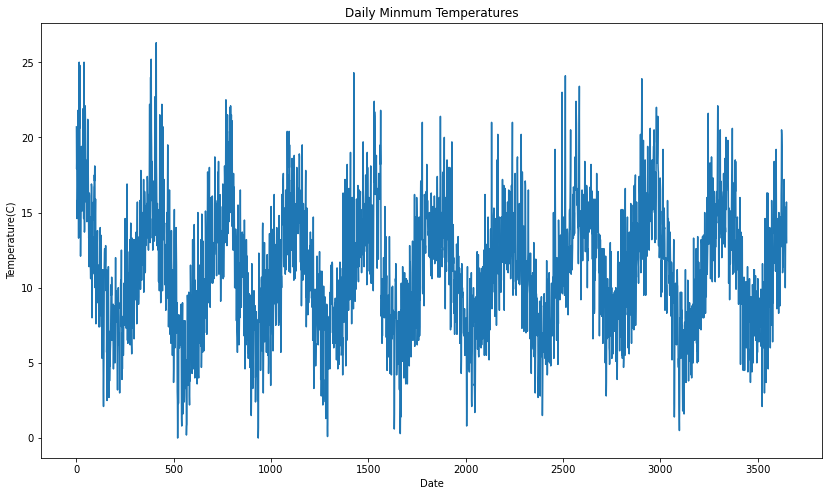

In [5]:
df.plot(title='Daily Minmum Temperatures',figsize=(14,8),legend=None)
plt.xlabel("Date")
plt.ylabel('Temperature(C)')
plt.show()

In [6]:
pip install --upgrade numpy  --user

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install statsmodels --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.



  Using cached numpy-1.22.4-cp38-cp38-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


In [8]:
from statsmodels.tsa.stattools import kpss

In [9]:
!pip install --upgrade numpy==1.24.3

  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Rolling back uninstall of numpy
  Moving to c:\users\admin\appdata\roaming\python\python38\scripts\f2py.exe
   from C:\Users\Admin\AppData\Local\Temp\pip-uninstall-7fowq6zy\f2py.exe
  Moving to c:\users\admin\appdata\roaming\python\python38\site-packages\numpy-1.22.4.dist-info\
   from C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\~umpy-1.22.4.dist-info
  Moving to c:\users\admin\appdata\roaming\python\python38\site-packages\numpy\
   from C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\~~mpy


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\numpy\\LICENSE.txt'
Consider using the `--user` option or check the permissions.



In [10]:
!pip install --upgrade statsmodels

  Using cached statsmodels-0.14.1-cp38-cp38-win_amd64.whl (10.0 MB)
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\patsy\\build.py'
Consider using the `--user` option or check the permissions.



In [11]:
from statsmodels.tsa.stattools import kpss

In [13]:
def kpss_test(series):
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic:{statistic:.4f}')
    print(f'p-value:{p_value:4f}')
    print('Critical Values')
    for key,value in critical_values.items():
        print(f'{key}: {value:.4f}')
    print(f'Result:the series is{"not " if p_value < 0.05 else ""}stationary')
kpss_test(df['Temp'])

KPSS Statistic:0.0651
p-value:0.100000
Critical Values
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Result:the series isstationary


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
decomposition = seasonal_decompose(df['Temp'],model='additive',period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual= decomposition.resid

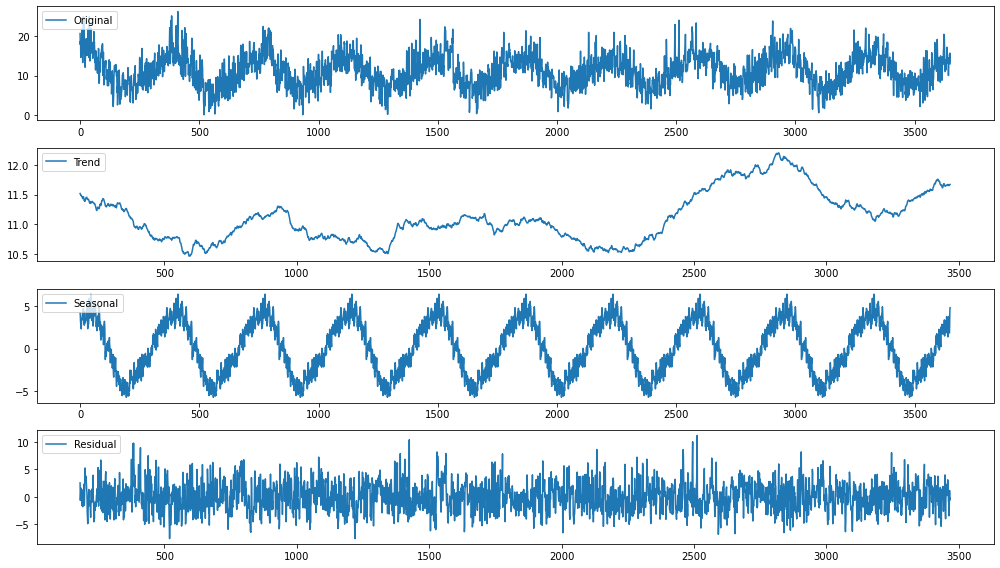

In [18]:
plt.figure(figsize=(14,8))
plt.subplot(411)
plt.plot(df['Temp'],label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label="Trend")
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label="Seasonal")
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label="Residual")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()